In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv("2019.csv")
df = df.drop(["Overall rank"], axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 8 columns):
Country or region               156 non-null object
Score                           156 non-null float64
GDP per capita                  156 non-null float64
Social support                  156 non-null float64
Healthy life expectancy         156 non-null float64
Freedom to make life choices    156 non-null float64
Generosity                      156 non-null float64
Perceptions of corruption       156 non-null float64
dtypes: float64(7), object(1)
memory usage: 9.9+ KB


###### __1.__ Untuk setiap numerik feature/column (kecuali column Overall Rank), hitunglah:

- Mean, Median dan Modus
- Range, Q1, Q3 dan IQR
- Standard Deviasi & Variance
- Z-score tiap data point

In [4]:
df1 = df.drop(['Country or region'], axis=1)
df1 = df1.agg({col : ['mean',
                      'median',
                      lambda x: x.value_counts().index[0],
                      lambda x: x.max() - x.min(),
                      lambda x: x.quantile(q=0.25),
                      lambda x: x.quantile(q=0.75),
                      lambda x: x.quantile(q=0.75) - x.quantile(q=0.25),
                      lambda x: x.std(ddof=1),
                      lambda x: x.var(ddof=1),
                      ] for col in df1.columns
                })
df1.index = ['Mean', 'Median', 'Modus', 'Range', 'Q1', 'Q3', 'IQR', 'Standard Deviasi', 'Variance']
df1

# Modus hanya menampilkan nilai terbesar dan count terbanyak. Beberapa kolom memiliki lebih dari satu modus
# Std and var menggunakan sample statistic karena jelas data tidak mencakup semua negara

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Mean,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
Median,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
Modus,5.208000,0.960000,1.465000,0.999000,0.498000,0.153000,0.028000
Range,4.916000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000
Q1,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
Q3,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
IQR,1.640000,0.629750,0.396750,0.334000,0.199250,0.139500,0.094250
Standard Deviasi,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
Variance,1.239036,0.158714,0.089515,0.058624,0.020532,0.009073,0.008937


In [5]:
# data point in Z-value
df2 = df.copy()
for col in ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']:
  df2[col] = (df2[col] - df1.loc['Mean', col]) / df1.loc['Standard Deviasi', col]
df2

,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,2.121877,1.091526,1.264027,1.076954,1.419710,-0.334327,2.987137
1,Denmark,1.970052,1.199461,1.217234,1.118255,1.391794,0.704994,3.166959
2,Norway,1.928727,1.463022,1.247315,1.250419,1.468562,0.904460,2.437092
3,Iceland,1.874824,1.191931,1.387693,1.242159,1.384816,1.775811,0.078248
4,Netherlands,1.869434,1.232092,1.046774,1.130646,1.147534,1.439868,1.982248
...,...,...,...,...,...,...,...,...
151,Rwanda,-1.862420,-1.370888,-1.663865,-0.459449,1.133576,0.337557,3.177537
152,Tanzania,-1.954952,-1.077206,-1.082297,-0.934412,0.170490,0.956951,0.385004
153,Afghanistan,-1.980107,-1.393479,-2.312279,-1.504368,-2.739702,-0.281836,-0.905485
154,Central African Republic,-2.087912,-2.206754,-4.040270,-2.561677,-1.169454,0.526525,-0.799707


###### __2.__ Untuk setiap numerik feature/column (kecuali column Overall Rank), carilah data outlier-nya berdasarkan:

- IQR method
- Z-score method

In [6]:
# IQR method
outliers_IQR = {}

for col in ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']:
  lim_top = df1.loc['Q3', col] + (1.5 * df1.loc['IQR', col])
  lim_bot = df1.loc['Q1', col] - (1.5 * df1.loc['IQR', col])
  outliers_IQR[col] = [x for x in df[col].values if x > lim_top or x < lim_bot]
  
outliers_IQR

{'Freedom to make life choices': [0.0],
 'GDP per capita': [],
 'Generosity': [0.498, 0.5660000000000001],
 'Healthy life expectancy': [0.0],
 'Perceptions of corruption': [0.39299999999999996,
  0.41,
  0.341,
  0.298,
  0.34299999999999997,
  0.373,
  0.38,
  0.308,
  0.29,
  0.316,
  0.31,
  0.45299999999999996,
  0.287,
  0.41100000000000003],
 'Score': [],
 'Social support': [0.43700000000000006, 0.447, 0.37799999999999995, 0.0]}

In [7]:
# Z-score method
outliers_Z = {}

for col in ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
            'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']:
  lim_top = df1.loc['Mean', col] + (2* df1.loc['Standard Deviasi', col])
  lim_bot = df1.loc['Mean', col] - (2* df1.loc['Standard Deviasi', col])
  outliers_Z[col] = [x for x in df[col].values if x > lim_top or x < lim_bot]

outliers_Z

{'Freedom to make life choices': [0.067,
  0.086,
  0.066,
  0.026000000000000002,
  0.013000000000000001,
  0.0,
  0.01],
 'GDP per capita': [0.0, 0.094, 0.073, 0.046, 0.026000000000000002],
 'Generosity': [0.498, 0.5660000000000001, 0.419],
 'Healthy life expectancy': [0.23199999999999998, 0.192, 0.0, 0.168, 0.105],
 'Perceptions of corruption': [0.39299999999999996,
  0.41,
  0.341,
  0.34299999999999997,
  0.373,
  0.38,
  0.308,
  0.316,
  0.31,
  0.45299999999999996,
  0.41100000000000003],
 'Score': [7.769, 3.083, 2.853],
 'Social support': [0.43700000000000006,
  0.5720000000000001,
  0.447,
  0.37799999999999995,
  0.56,
  0.517,
  0.0,
  0.575]}

###### __3.__ Tampilkan sebaran masing-masing numerik feature/column (kecuali column Overall Rank) dalam bentuk boxplot dan histogram!

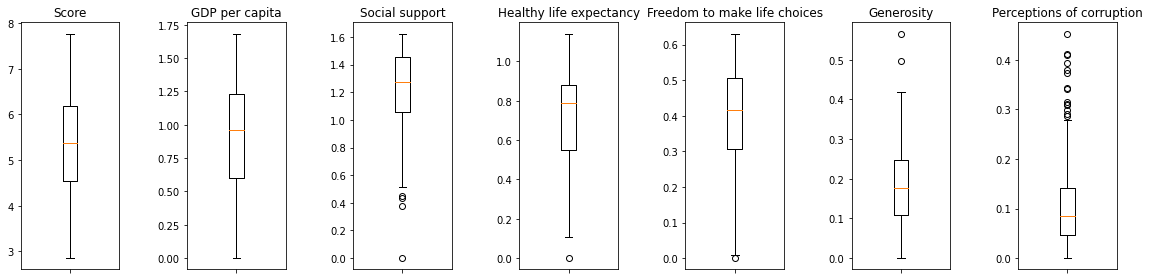

In [8]:
fig, ax = plt.subplots(1, 7, figsize=(16,4))
ax = ax.flatten()

for i, col in enumerate(['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                         'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']):
  ax[i].boxplot(df[col])
  ax[i].set_title(col)
  ax[i].set_xticklabels([], visible=False)
fig.tight_layout()

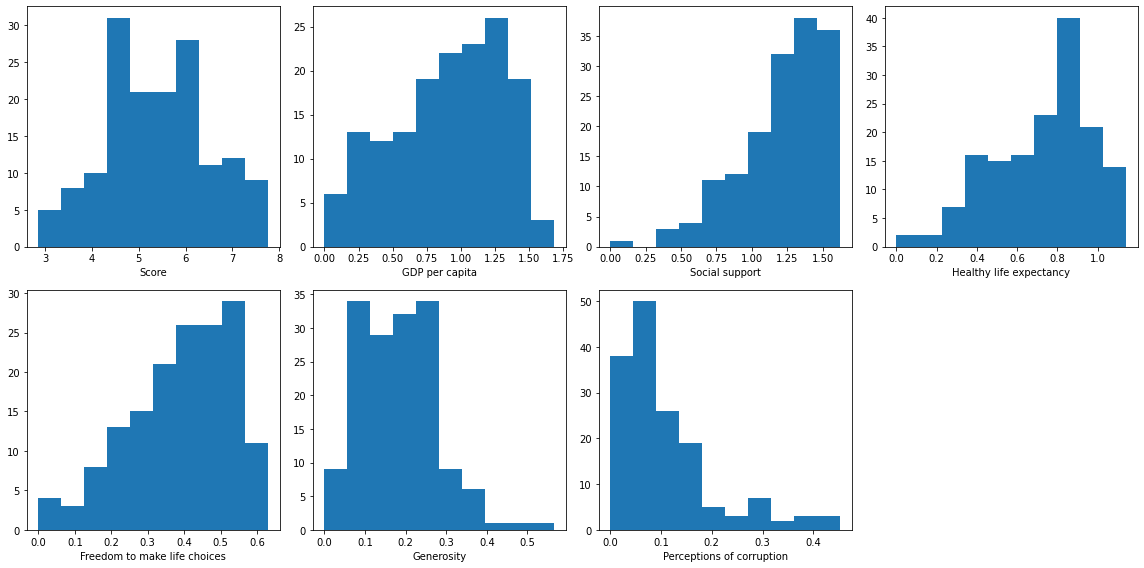

In [9]:
fig, ax = plt.subplots(2, 4, figsize=(16,8))
ax = ax.flatten()

for i, col in enumerate(['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy',
                         'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']):
  ax[i].hist(df[col])
  ax[i].set_xlabel(col)
ax[7].set_visible(False)
    
fig.tight_layout()

###### __4.__ Di antara semua numerik feature/column (kecuali column Overall Rank), feature/column mana saja yang sangat mempengaruhi happiness score suatu negara? Buktikan dengan menghitung nilai:

- Covariance
- Pearson Correlation
- Spearman Correlation
- Kendall Correlation

In [10]:
df.cov()['Score'].sort_values(ascending=False)

Score                           1.239036
GDP per capita                  0.352052
Social support                  0.258788
Healthy life expectancy         0.210189
Freedom to make life choices    0.090394
Perceptions of corruption       0.040579
Generosity                      0.008040
Name: Score, dtype: float64

In [11]:
df.corr(method="pearson")['Score'].sort_values(ascending=False)

Score                           1.000000
GDP per capita                  0.793883
Healthy life expectancy         0.779883
Social support                  0.777058
Freedom to make life choices    0.566742
Perceptions of corruption       0.385613
Generosity                      0.075824
Name: Score, dtype: float64

In [12]:
df.corr(method="spearman")['Score'].sort_values(ascending=False)

Score                           1.000000
Social support                  0.816181
GDP per capita                  0.814483
Healthy life expectancy         0.807275
Freedom to make life choices    0.551974
Perceptions of corruption       0.217348
Generosity                      0.070483
Name: Score, dtype: float64

In [13]:
df.corr(method="kendall")['Score'].sort_values(ascending=False)

Score                           1.000000
GDP per capita                  0.619993
Social support                  0.616792
Healthy life expectancy         0.602613
Freedom to make life choices    0.394203
Perceptions of corruption       0.140974
Generosity                      0.043759
Name: Score, dtype: float64

Berdasarkan nilai covariance dan correlation terhadap Score, diketahui __top 3 features : GDP per capita, Social support, Healthy life expectancy__ dengan nilai yang relatif sama atau dekat. Sedang 3 feature lainnya memiliki korelasi yang tidak kuat, bahkan tidak memiliki korelasi (feature Generosity).

###### __5.__ Visualisasikan dalam bentuk bar chart data berikut:

- 10 Negara dengan GDP per capita tertinggi.
- 10 Negara dengan Healthy life expectancy tertinggi.
- 10 Negara dengan Perceptions of corruption tertinggi.

In [0]:
import seaborn as sns

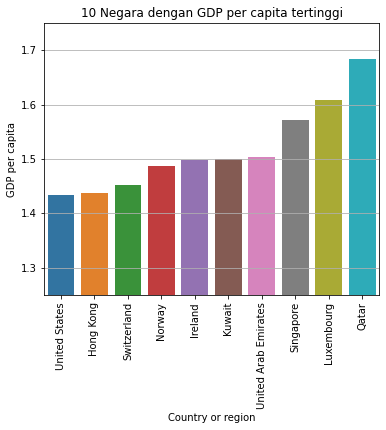

In [15]:
df_10gdp = df.sort_values(by='GDP per capita', ascending=True).iloc[-10:]

plt.figure(figsize=(6,5))
ax = sns.barplot(x='Country or region', y='GDP per capita',
            data = df_10gdp)
ax.set_title('10 Negara dengan GDP per capita tertinggi')
ax.set_xticklabels(df_10gdp['Country or region'], rotation='vertical')
ax.set_ylim((1.25, 1.75))
ax.grid(axis='y');

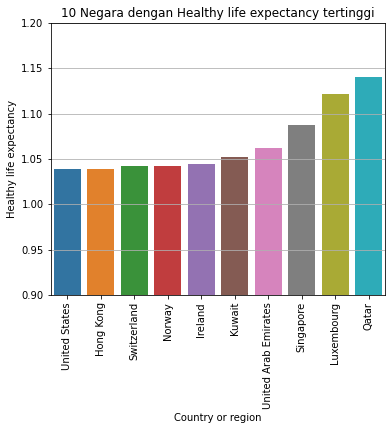

In [16]:
df_10health = df.sort_values(by='Healthy life expectancy', ascending=True).iloc[-10:]

plt.figure(figsize=(6,5))
ax = sns.barplot(x='Country or region', y='Healthy life expectancy',
            data = df_10health)
ax.set_title('10 Negara dengan Healthy life expectancy tertinggi')
ax.set_xticklabels(df_10gdp['Country or region'], rotation='vertical')
ax.set_ylim((0.9, 1.2))
ax.grid(axis='y');

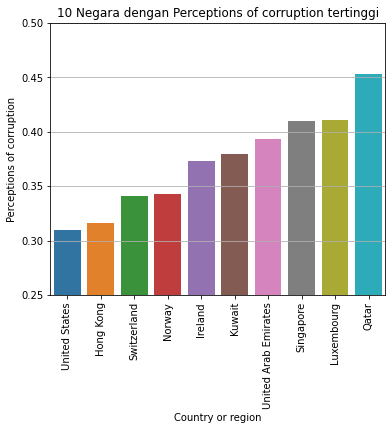

In [17]:
df_10pop = df.sort_values(by='Perceptions of corruption', ascending=True).iloc[-10:]

plt.figure(figsize=(6,5))
ax = sns.barplot(x='Country or region', y='Perceptions of corruption',
            data = df_10pop)
ax.set_title('10 Negara dengan Perceptions of corruption tertinggi')
ax.set_xticklabels(df_10gdp['Country or region'], rotation='vertical')
ax.set_ylim((0.25, 0.5))
ax.grid(axis='y');